<a href="https://colab.research.google.com/github/maliekici/zero_to_ComputerVision/blob/main/lectures/transformations_translations_rotations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [4]:
def image_show(title = "Image", image = None, size = 10):
    width, high = image.shape[0], image.shape[1]
    aspect_ratio = width / high
    plt.figure(figsize=(size * aspect_ratio, size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

* **Translations**:
cv2.warpAffine(image, T, (width, height))
   *  [1 0 Tx] = T
   *  [0 1 Ty]

* Tx represents the shift along the x-axis(horizontal)
* Ty represents the shift along the y-axis(vartical)

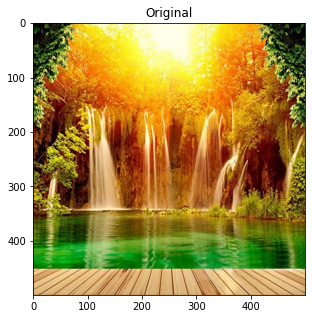

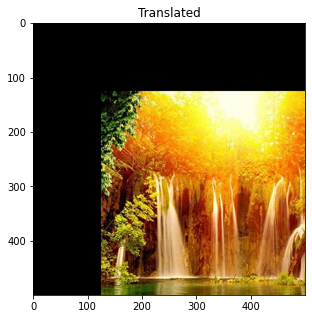

In [23]:
#load image
image = cv2.imread('img_folder/5.jpg')
image_show("Original", image, 5)
#store height and width of the image
height, width = image.shape[:2]

#we shift it by quarter of the height and width
quarter_heigh, quarter_width = height/4 ,width/4
#T is our translation matrix
T = np.float32([[1, 0, quarter_width], [0, 1, quarter_heigh]])
img_translation = cv2.warpAffine(image, T, (height, width))
image_show("Translated", img_translation, 5)
#movind top left becasuse openCV default start cordinates is top left

In [8]:
#what does T look like
print(T)
print(height, width) #500 / 4 = 125

[[  1.   0. 125.]
 [  0.   1. 125.]]
500 500


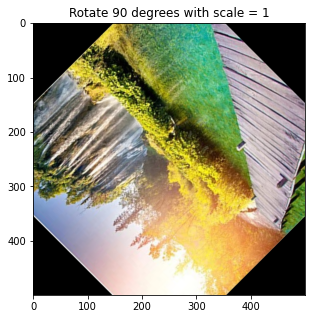

In [25]:
#Rotations
#cv2.getRotationMatrix2D(rotation_center_x, rotation_center_y, angle of rotation, scale)
#load image
image4 = cv2.imread('img_folder/4.jpg')
height , width = image4.shape[:2]
#divide by two to rotate the image arounda its center
rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), 135, 1)
#input our image, the rotation matrix and our desired final width and height
rotated_image = cv2.warpAffine(image4, rotation_matrix,(width, height))
image_show("Rotate 90 degrees with scale = 1", rotated_image,5)

In [21]:
#whats rotation matrix looks like
print(rotation_matrix)

[[ -0.70710678   0.70710678 250.        ]
 [ -0.70710678  -0.70710678 603.55339059]]


#Rotations with cv2.transpose (less flexible)

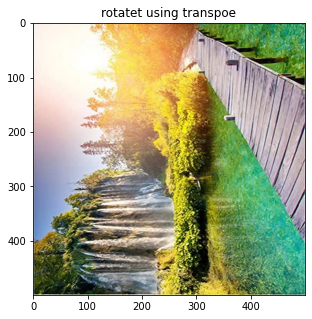

In [28]:
rotated_image = cv2.transpose(image4)
image_show("rotatet using transpoe", rotated_image, 5)

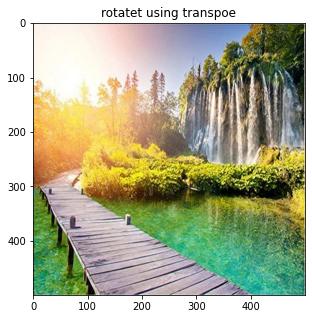

In [30]:
#if you apply twice you bet gack what supposedly is the original image.
rotated_image = cv2.transpose(rotated_image)
image_show("rotatet using transpoe", rotated_image, 5)

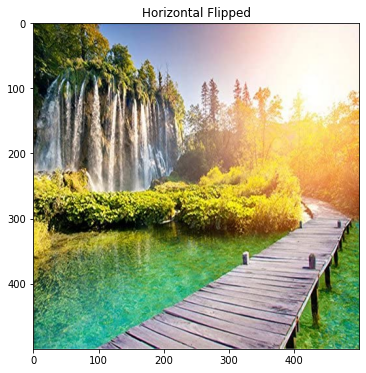

In [40]:
#Let's now to a horizontal flip. like a mirror
flipped = cv2.flip(image4, 1)
image_show("Horizontal Flipped", flipped, 6)